<a href="https://colab.research.google.com/github/HoBooom/2025_2_CV_study/blob/main/homework_week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

12214204 최호범
cv_week9

In [39]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [40]:
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')
print("Using PyTorch version : ", torch.__version__," Device : ",DEVICE)

BATSH_SIZE = 32
EPOCHS = 10


Using PyTorch version :  2.8.0+cu126  Device :  cpu


In [41]:
train_datasets = datasets.MNIST(root='../data/MNIST',
                                train=True,
                                download=True,
                                transform=transforms.ToTensor())
test_datasets = datasets.MNIST(root='../data/MNIST',
                               train=False,
                               transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_datasets,
                                           batch_size=BATSH_SIZE,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_datasets,
                                          batch_size=BATSH_SIZE,
                                          shuffle=False)

In [42]:
for (X_train,y_train) in train_loader:
  print('X_train : ', X_train.size(), 'type : ', X_train.type())
  print('y_train : ', y_train.size(), 'type : ', y_train.type())
  break


X_train :  torch.Size([32, 1, 28, 28]) type :  torch.FloatTensor
y_train :  torch.Size([32]) type :  torch.LongTensor


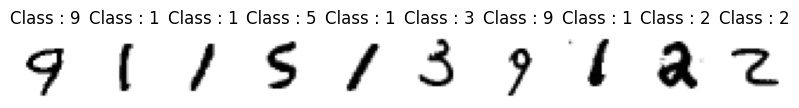

In [58]:
pltsize=1
plt.figure(figsize=(10*pltsize,pltsize)) #전체 그림판(figure)크기 설정

for i in range(10):
  plt.subplot(1,10,i+1) #그림판을 1행,10열로 나누고, 현재 (i + 1)번째 위치에 이미지를 그림
  plt.axis('off')
  plt.imshow(X_train[i,:,:,:].numpy().reshape(28, 28), cmap='gray_r')
  plt.title('Class : '+str(y_train[i].item()))

In [44]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self,x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

In [45]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [46]:
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        # 초기 세팅
        # 그라디언트 초기화, pytorch는 그라디언트 누적으로 새 배치마다 초기화 해야함
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()

        # 실제 계산
        output = model(image) # 순전파
        loss = criterion(output, label) # loss 계산
        loss.backward() # 역전파
        optimizer.step() # 가중치 업데이트

        if batch_idx % log_interval == 0:
            print("Train Epoch : {} [{}/{} ({:.0f}%)]\tLoss : {:.6f}".format(
                epoch, batch_idx * len(image),
                len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item()))

In [47]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    # test이기 때문에 그라디언트 계산 비활성화
    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim=True)[1] #가장 확률이 높은 클래스idx반환
            correct += prediction.eq(label.view_as(prediction)).sum().item()

    test_loss /= (len(test_loader.dataset) / BATSH_SIZE)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return (test_loss, test_accuracy)

Train Epoch : 1 [0/60000 (0%)]	Loss : 0.209920
Train Epoch : 1 [6400/60000 (11%)]	Loss : 0.241244
Train Epoch : 1 [12800/60000 (21%)]	Loss : 0.292599
Train Epoch : 1 [19200/60000 (32%)]	Loss : 0.263168
Train Epoch : 1 [25600/60000 (43%)]	Loss : 0.309926
Train Epoch : 1 [32000/60000 (53%)]	Loss : 0.112644
Train Epoch : 1 [38400/60000 (64%)]	Loss : 0.122573
Train Epoch : 1 [44800/60000 (75%)]	Loss : 0.386166
Train Epoch : 1 [51200/60000 (85%)]	Loss : 0.247652
Train Epoch : 1 [57600/60000 (96%)]	Loss : 0.511552
[EPOCH : 1], 	Test Loss : 0.3239, 	Test Accuracy : 90.72 %
Train Epoch : 2 [0/60000 (0%)]	Loss : 0.347788
Train Epoch : 2 [6400/60000 (11%)]	Loss : 0.183907
Train Epoch : 2 [12800/60000 (21%)]	Loss : 0.114529
Train Epoch : 2 [19200/60000 (32%)]	Loss : 0.209611
Train Epoch : 2 [25600/60000 (43%)]	Loss : 0.188297
Train Epoch : 2 [32000/60000 (53%)]	Loss : 0.254272
Train Epoch : 2 [38400/60000 (64%)]	Loss : 0.245047
Train Epoch : 2 [44800/60000 (75%)]	Loss : 0.136995
Train Epoch : 2 [

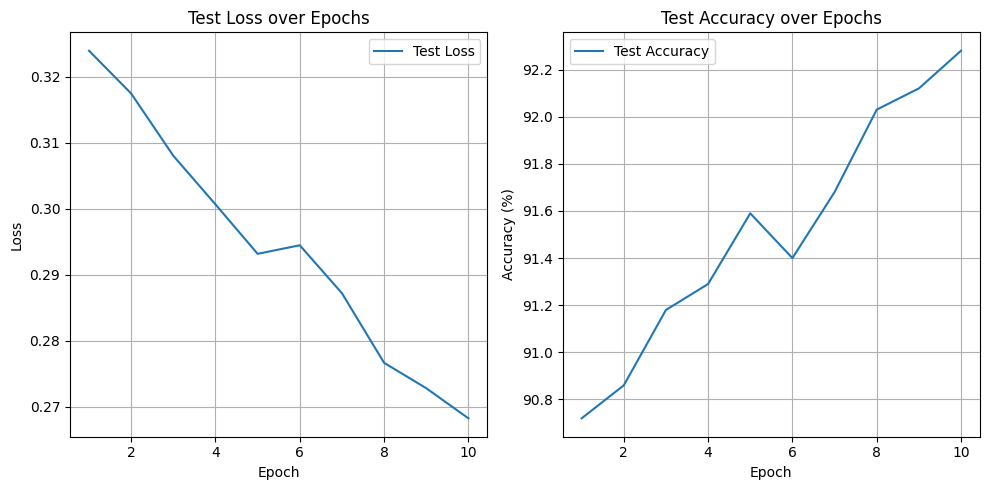

In [60]:
test_losses_history = []
test_accuracies_history = []

for epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer, log_interval = 200)
  test_loss, test_accuracy = evaluate(model, test_loader)
  test_losses_history.append(test_loss)
  test_accuracies_history.append(test_accuracy)
  print("[EPOCH : {}], \tTest Loss : {:.4f}, \tTest Accuracy : {:.2f} %".format(
      epoch, test_loss, test_accuracy))

# Plotting the results
epochs_range = range(1, EPOCHS + 1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, test_losses_history, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Test Loss over Epochs')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, test_accuracies_history, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()